#Introduction to Python for Statistical Learning

The first session in our statistical learning in Python series will briefly touch on some of the core components of Python's scientific computing stack that we will use extensively later in the course. We will not only introduce two important libraries for data wrangling, [numpy](http://numpy.org) and [pandas](http://pandas.pydata.org/), but also show how to create plots using [matplotlib](http://matplotlib.org/). Please note that this is not a thorough introduction to these libraries; instead, we would like to point out what basic functionality they provide and how they differ from their counterparts in R.

But before we get into the details we will briefly describe how to setup a Python environment and what packages you need to install in order to run the code examples in this notebook.

## Requirements

###Python environment

We strongly recommend that you use a bundled Python distribution such as [Anaconda](https://store.continuum.io/cshop/anaconda/). We have assembled a quick installation guide for Mac, Linux, and Windows in [a previous blog post](http://datarobot.com/blog/getting-up-and-running-with-python/).
    
To run the R examples in this code you also need:

    rpy2>=2.3.1
    
You can find instructions how to install ``rpy2`` [here](http://rpy.sourceforge.net/rpy2/doc-dev/html/overview.html) . If you have an working R environment on your machine the following command should install ``rpy2``:

    $ pip install -U rpy2
    
To test if ``rpy2`` was installed correctly run:

    $ python -m 'rpy2.tests'
    
If you run on Anaconda and it complains that it misses ``libreadline.so`` please install the following conda package:

    $ conda install python=2.7.5=2

###IPython

IPython is an interactive computing environment for Python. It is a great tool for interactive data analysis and programming in general. Amongst other things it features a web-based notebook server that supports code, documentation, inline plots, and much more. In fact, all blog posts in this series will be written using IPython notebooks with the advantage that you can simply download it from [here](http://d1pqsl2386xqi9.cloudfront.net/notebooks/intro_to_statistical_learning_in_python.ipynb) and either run it locally or view it on [nbviewer](http://nbviewer.ipython.org/urls/d1pqsl2386xqi9.cloudfront.net/notebooks/intro_to_statistical_learning_in_python.ipynb). 

## Manipulating Data

The goal of this session is to get familiar with the basics of how to work with data in Python. The basic data containers that are used to manipulate data in Python are n-dimensional arrays that act either as vectors, matrices, or tensors.

In contrast to statistical computing environments like R, the fundamental data structures for data analysis in Python are not built into the computing environment but are available via dedicated 3rd party libraries. These libraries are called ``numpy`` and ``pandas``.

### Numpy

Numpy is the lingua-franca in the Python scientific computing ecosystem. It basically provides an n-dimensional array object that holds elements of a specific ``dtype`` (eg. ``numpy.float64`` or ``numpy.int32``). Most packages that we will discuss in this series will directly operate on arrays. Numpy also provides common operations on arrays such as element-wise arithmetic, indexing/slicing, and basic linear algebra (dot product, matrix decompositions, ...). 

Below we show some basic working with numpy arrays:

In [36]:
from __future__ import division  # always use floating point division
import numpy as np  # convention, use alias ``np``

# a one dimensional array
x = np.array([2, 7, 5])
print 'x:', x  # print x

# a sequence starting from 4 to 12 with a step size of 3
y = np.arange(4, 12, 3)
print 'y:', y

# element-wise operations on arrays
print 'x + y:', x + y
print 'x / y:', x / y
print 'x ^ y:', x ** y  # python uses ** for exponentiation

x: [2 7 5]
y: [ 4  7 10]
x + y: [ 6 14 15]
x / y: [ 0.5  1.   0.5]
x ^ y: [     16  823543 9765625]


If you need any help on operations such as ``np.arange`` you can access its documentation by either typing ``help(np.arange)`` or -- if you use IPython -- write a ``'?'`` after the command: ``np.arange?``.

You can index and slice an array using square brackets ``[]``. To slice an array, numpy uses Python's slicing syntax ``x[start:end:step]`` where step is the step size which is optional. If you omit ``start`` or ``end`` it will use the beginning or end, respectively. Python uses exclusive semantics meaning that the element with position ``end`` is not included in the result.
Indexing can be done either by position or by using a boolean mask:

In [37]:
print x[1]  # second element of x
print x[1:3]  # slice of x that includes second and third elements
print
print x[-2]  # indexing using negative indices - starts from -1
print x[-np.array([1, 2])]   # fancy indexing using index array
print

print x[np.array([False, True, True])]  # indexing using boolean mask

7
[7 5]

7
[5 7]

[7 5]


For two or more dimensional arrays we just add slicing/indexing arguments, to select the whole dimension you can simply put a colon (``:``).

In [38]:
# reshape sequence to 2d array (=matrix) where rows hold contiguous sequences
# then transpose so that columns hold contiguous sub sequences
z_temp = np.arange(1, 13).reshape((3,4))
print "z_temp"
print z_temp
print

# transpose
z = z_temp.T
print "z = z_temp.T (transpose of z_temp)"
print z
print

# slicing along two dimensions
a = z[2:4, 1:3]
print "a = z[2:4, 1:3]"
print a
print

# slicing along 2nd dimension
b = z[:, 1:3] 
print "b = z[:, 1:3]"
print b
print

# first column, returns 1d array
c = z[:, 0]
print "c = z[:, 0]"
print c # one dimensional
print

# first column but return 2d array (remember: exclusive semantics)
cc = z[:, 0:1]
print "cc = z[:, 0:1]"
print cc  # two dimensional; column vector

z_temp
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

z = z_temp.T (transpose of z_temp)
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]

a = z[2:4, 1:3]
[[ 7 11]
 [ 8 12]]

b = z[:, 1:3]
[[ 5  9]
 [ 6 10]
 [ 7 11]
 [ 8 12]]

c = z[:, 0]
[1 2 3 4]

cc = z[:, 0:1]
[[1]
 [2]
 [3]
 [4]]


To get information on the dimensionality and shape of an array you will find the following methods useful:

In [39]:
print z.shape  # number of elements along each axis (=dimension)
print z.ndim  # number of dimensions

print z[:, 0].ndim  # return first column as 1d array

(4, 3)
2
1


In numpy, slicing will return a new array that is basically a view on the original array, thus, it doesn't require copying any memory. Indexing (in numpy often called *fancy indexing*), on the other hand, always copies the underlying memory.

#### Differences to R

R differentiates between vectors and matrices whereas in numpy both are unified by the n-dimensional ``numpy.ndarray`` class.
There are a number of crucial differences in how indexing and slicing are handled in Python vs. R.

Note that the examples below require the Python package ``rpy2`` to be installed.

In [66]:
# allows execution of R code in IPython
try:
    %load_ext rmagic
except ImportError:
    print "Please install rpy2 to run the R/Python comparision code examples"

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


Python uses *0-based indexing* whereas indices in R start from 1:

In [41]:
x = np.arange(5)  # seq has excl semantics
x[0]

0

In [65]:
%%R  # tells IPython that the following lines will be R code
x <- seq(0, 4)  # seq has incl semantics
print(x[1])

[1] 0


Python uses exclusive semantics for slicing whereas R uses inclusive semantics:

In [43]:
x[0:2]  # doesnt include index 2

array([0, 1])

In [44]:
%%R
x <- seq(0, 4)  # seq has incl semantics
print(x[1:2])  # includes index 2

[1] 0 1


Negative indices have different semantics: in Python they are used to index from the end on an array whereas in R they are used to drop positions:

In [45]:
x[-2]  # second element from the end

3

In [46]:
%%R
x <- seq(0, 4)  # seq has incl semantics
print(x[-2])  # drop 2nd position, ie 1

[1] 0 2 3 4


If you index on a specific position of a matrix both R and Python will return a vector (ie. array with one less dimension). If you want to retain the dimensionality, R supports a ``drop=FALSE`` argument whereas in Python you have to use slicing instead:

In [47]:
X = np.arange(4).reshape((2, 2)).T  # 2d array
X[0:1, :]  # still 2d array - slice selects one element

array([[0, 2]])

In [48]:
%%R
X = matrix(seq(0, 3), 2, 2)
print(X[1, , drop=FALSE])  # use drop=FALSE

     [,1] [,2]
[1,]    0    2


### Pandas

As ``numpy``, ``pandas`` provides a key data structure: the ``pandas.DataFrame``; as can be inferred from the name it behaves very much like an R data frame. Pandas data frames address three deficiencies of arrays:

  1. they hold *heterogenous data*; each column can have its own ``numpy.dtype``,
  2. the axes of a DataFrame are *labeled* with column names and row indices, 
  3. and, they account for *missing values* which this is not directly supported by arrays.

Data frames are extremely useful for data munging. They provide a large range of operations such as filter, join, and group-by aggregation. 

Below we briefly show some of the core functionality of pandas data frames using some sample data from the website of the book ["Introduction to Statistical Learning"](http://www-bcf.usc.edu/~gareth/ISL/):

In [49]:
import pandas as pd  # convention, alias ``pd``

# Load car dataset
auto = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
auto.head()  # print the first lines

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0   18          8           307        130    3504          12.0    70   
1   15          8           350        165    3693          11.5    70   
2   18          8           318        150    3436          11.0    70   
3   16          8           304        150    3433          12.0    70   
4   17          8           302        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

One of the first things you should do when you work with a new dataset is to look at some summary statistics such as mean, min, max, the number of missing values and quantiles. For this, pandas provides the convenience method ``pd.DataFrame.describe``:

In [50]:
auto.describe()

mpg   cylinders  displacement       weight  acceleration        year      origin
count  397.000000  397.000000    397.000000   397.000000    397.000000  397.000000  397.000000
mean    23.515869    5.458438    193.532746  2970.261965     15.555668   75.994962    1.574307
std      7.825804    1.701577    104.379583   847.904119      2.749995    3.690005    0.802549
min      9.000000    3.000000     68.000000  1613.000000      8.000000   70.000000    1.000000
25%     17.500000    4.000000    104.000000  2223.000000     13.800000   73.000000    1.000000
50%     23.000000    4.000000    146.000000  2800.000000     15.500000   76.000000    1.000000
75%     29.000000    8.000000    262.000000  3609.000000     17.100000   79.000000    2.000000
max     46.600000    8.000000    455.000000  5140.000000     24.800000   82.000000    3.000000

You can use the dot ``.`` or bracket ``[]`` notation to access columns of the dataset. To add new columns you have to use the bracket ``[]`` notation:

In [51]:
mpg = auto.mpg  # get mpg column
weight = auto['weight']  # get weight column
auto['mpg_per_weight'] = mpg / weight

print auto[['mpg', 'weight', 'mpg_per_weight']].head()

   mpg  weight  mpg_per_weight
0   18    3504        0.005137
1   15    3693        0.004062
2   18    3436        0.005239
3   16    3433        0.004661
4   17    3449        0.004929


Columns and rows of a data frame are labeled, to access/manipulate the labels either use ``pd.DataFrame.columns`` or ``pd.DataFrame.index``:

In [52]:
print(auto.columns)
print(auto.index[:10])

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight', u'acceleration', u'year', u'origin', u'name', u'mpg_per_weight'], dtype=object)
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)


Indexing and slicing work similar as for numpy arrays just that you can also use column and row labels instead of positions:

In [53]:
auto.ix[0:5, ['weight', 'mpg']]  # select the first 5 rows and two columns weight and mpg

weight  mpg
0    3504   18
1    3693   15
2    3436   18
3    3433   16
4    3449   17
5    4341   15

For more information on ``pandas`` please consult the excellent [online documentation](http://pandas.pydata.org/pandas-docs/stable/index.html) or the references at the end of this post.


#### Differences to R

The major difference between the data frame in R and pandas from a user's point of view is that pandas uses an object-oriented interface (ie methods) whereas R uses a functional interface:

In [54]:
auto.head(2)

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0   18          8           307        130    3504          12.0    70   
1   15          8           350        165    3693          11.5    70   

   origin                       name  mpg_per_weight  
0       1  chevrolet chevelle malibu        0.005137  
1       1          buick skylark 320        0.004062

In [55]:
# this command pushes the pandas.DataFrame auto to R-land
%Rpush auto

In [56]:
%%R

auto = data.frame(auto)
print(head(auto, 2))

  mpg cylinders displacement horsepower weight acceleration year origin
0  18         8          307        130   3504         12.0   70      1
1  15         8          350        165   3693         11.5   70      1
                       name mpg_per_weight
0 chevrolet chevelle malibu    0.005136986
1         buick skylark 320    0.004061738


Below is a table that shows some of methods that pandas DataFrame provides and the corresponding functions in R:


<table>
<tr>
<th>Tables</th>
<th>Pandas</th>
<th>R</th>
</tr>
<tr>
<td>first rows</td>
<td><code>auto.head()</code></td>
<td><code>head(auto)</code></td>
</tr>
<tr>
<td>summary statistics</td>
<td><code>auto.describe()</code></td>
<td><code>summary(auto)</code></td>
</tr>
<tr>
<td>column access</td>
<td><code>auto['mpg']</code></td>
<td><code>auto$mpg</code></td>
</tr>
<tr>
<td>row access</td>
<td><code>auto.iloc[0]</code></td>
<td><code>auto[1,]</code></td>
</tr>

<tr>
<td>column deletion</td>
<td><code>del auto['mpg']</code></td>
<td><code>auto$mpg = NULL</code></td>
</tr>
<tr>
<td>column dtypes</td>
<td><code>auto.dtypes</code></td>
<td><code>str(auto)</code></td>
</tr>


<tr>
<td>unique elements</td>
<td><code>auto.year.unique()</code></td>
<td><code>unique(auto$year)</code></td>
</tr>

<tr>
<td>value counts</td>
<td><code>auto.year.value_counts()</code></td>
<td><code>table(auto$year)</code></td>
</tr>

</table>

##Plotting using Matplotlib

Like R there are several different options for creating statistical graphics in Python, including [Chaco](http://code.enthought.com/chaco/) and [Bokeh](http://bokeh.pydata.org/), but the most common plotting libary is [Matplotlib](http://matplotlib.org/). Here is a quick introduction on how to create graphics in Python similar to those created using the base R functions.

In [57]:
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt

data = np.random.randn(500)  # array of 500 random numbers

Populating the interactive namespace from numpy and matplotlib


To make a histogram you can use the ``hist()`` command

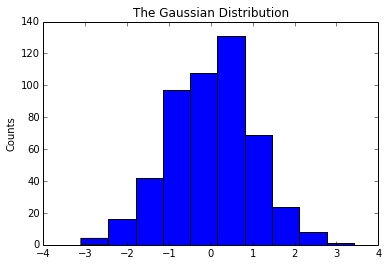

In [58]:
plt.hist(data)
plt.ylabel("Counts")
plt.title("The Gaussian Distribution")

Like R, you can specify various options to change the plotting behavior. For example, to make a histogram of frequency rather than of raw counts you pass the argument ``normed=True``

You can also easily make a scatter plot


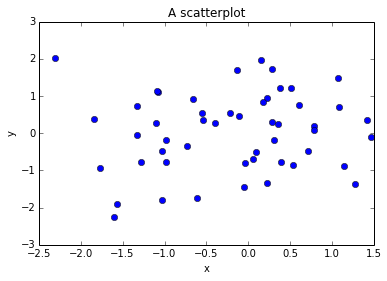

In [59]:
x = np.random.randn(50)
y = np.random.randn(50)

plt.plot(x, y, 'bo')  # b for blue, o for circles
plt.xlabel("x")
plt.ylabel("y")
plt.title("A scatterplot")

Matplotlib supports Matlab-style plotting commands, where you can quickly specify color (b for blue, r for red, k for black etc.) and a symbol for the plotting character (``'-'`` for solid lines, ``'--'`` for dashed lines, ``'*'`` for stars, ...)  

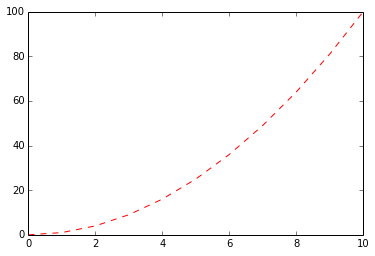

In [60]:
s = np.arange(11)
plt.plot(s, s ** 2, 'r--')

There is also a scatter command that also creates scatterplots

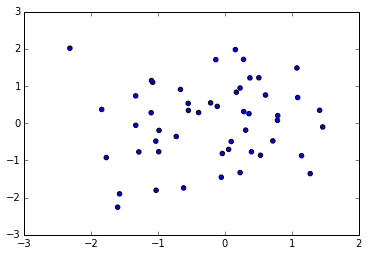

In [61]:
plt.scatter(x, y)

Boxplots are very useful to compare two distributions

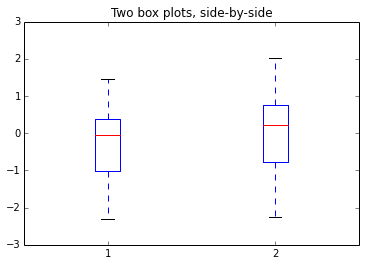

In [62]:
plt.boxplot([x, y])  # Pass a list of two arrays to plot them side-by-side
plt.title("Two box plots, side-by-side")

###Matplotlib and Pandas

Pandas provides a convenience interface to matplotlib, you can create plots by using the ``pd.DataFrame.plot()`` method

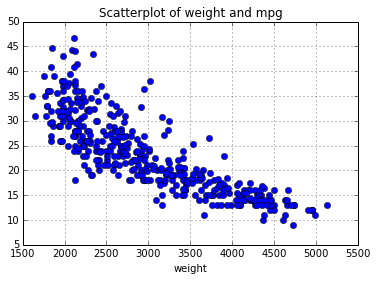

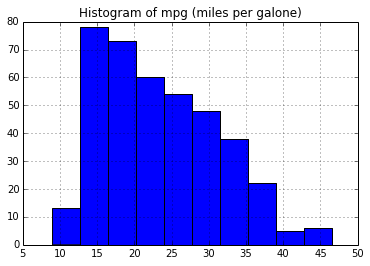

In [63]:
# create a scatterplot of weight vs "miles per galone"
auto.plot(x='weight', y='mpg', style='bo')
plt.title("Scatterplot of weight and mpg")

# create a histogram of "miles per galone"
plt.figure()
auto.hist('mpg')
plt.title("Histogram of mpg (miles per galone)")

Finally, pandas has built in support for creating scatterplot matrices and much [more](http://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plotting-features). 

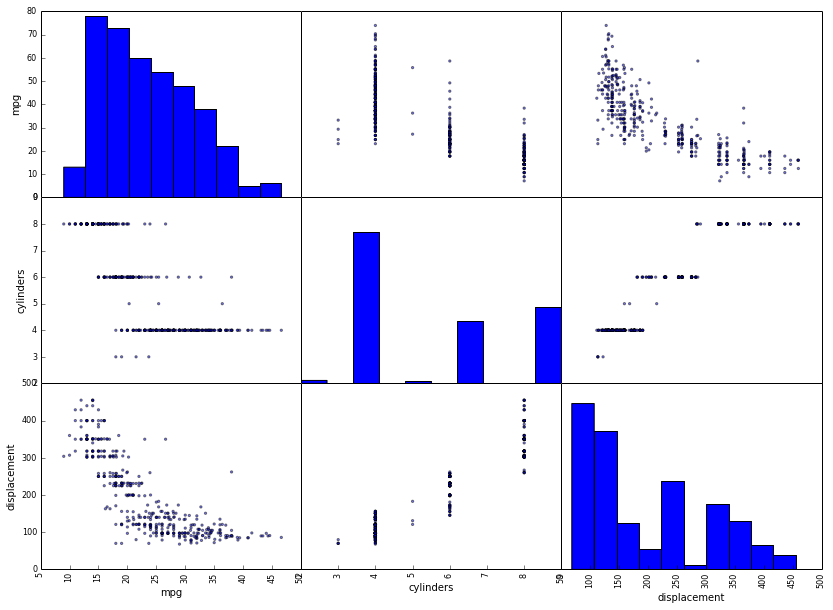

In [64]:
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix(auto[['mpg', 'cylinders', 'displacement']], figsize=(14, 10))

Matplotlib has a rich set of features to manipulate and style statistical graphics. Over the next few weeks we will cover many of them to help you make charts that you find visually appealing, but for now this should be enough to get you up and running in Python. 

## Further Reading

**[Python Scientific Lecture Notes](http://scipy-lectures.github.io/)**

For a more in-depth discussion of the Python scientific computing ecosystem we strongly recommend the Python Scientific Lecture Notes. The lecture notes contain lots of code examples from applied science such as signal processing, image processing, and machine learning.

**[Python for Data Analysis](http://www.kqzyfj.com/click-7040302-11260198?url=http%3A%2F%2Fshop.oreilly.com%2Fproduct%2F0636920023784.do&cjsku=0636920023784)**

[Wes Mckinney](http://blog.wesmckinney.com/), the original author of pandas, wrote a great book on using Python for data analysis. It is not only the primary reference to pandas but also features a concise yet profound introduction to Python, numpy and matplotlib.

![](http://akamaicovers.oreilly.com/images/0636920023784/cat.gif)